In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv('dataset/diabetes_processed.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [3]:
FEATURES = list(df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
LABEL = 'Outcome'

In [7]:
def build_model(n_components):
    x = df[FEATURES]
    y = df[LABEL]
    
    fa_obj = FactorAnalysis(n_components = n_components,
                            max_iter = 10000,
                            random_state = 10
                           )
    
    x_new = fa_obj.fit_transform(x)
    x = pd.DataFrame(x_new)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred
                                })
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return {'fact_a_obj' : fa_obj,
            'transform x' : x,
            'Accuracy' : acc,
            'Precision' : prec,
            'recall' : recall
           }

In [15]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test', key)
        
        print()
        print('Accuracy score: ', result_dict[key]['Accuracy'])
        print('Precision score: ', result_dict[key]['Precision'])
        print('Recall score: ', result_dict[key]['recall'])
    
    print()

In [16]:
def visualize_results(results_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['Accuracy'] for key in result_dict]
    prec = [result_dict[key]['Precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]
    
    plt.figure(figsize = (10, 6))
    plt.plot(n_components, acc, label = 'Accuracy')
    plt.plot(n_components, prec, label = 'Precision')
    plt.plot(n_components, recall, label = 'Recall')
    
    plt.xlabel('n_components')
    plt.ylabel('score')
    
    plt.legend()

In [17]:
result_dict = {}

for i in range(1, 9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [18]:
compare_results(result_dict)

Test n_components - 1

Accuracy score:  0.7142857142857143
Precision score:  0.7058823529411765
Recall score:  0.23529411764705882
Test n_components - 2

Accuracy score:  0.6753246753246753
Precision score:  0.6111111111111112
Recall score:  0.3793103448275862
Test n_components - 3

Accuracy score:  0.6753246753246753
Precision score:  0.8
Recall score:  0.25806451612903225
Test n_components - 4

Accuracy score:  0.7272727272727273
Precision score:  0.6666666666666666
Recall score:  0.5517241379310345
Test n_components - 5

Accuracy score:  0.7922077922077922
Precision score:  0.8297872340425532
Recall score:  0.6190476190476191
Test n_components - 6

Accuracy score:  0.7532467532467533
Precision score:  0.7142857142857143
Recall score:  0.5357142857142857
Test n_components - 7

Accuracy score:  0.7857142857142857
Precision score:  0.717948717948718
Recall score:  0.56
Test n_components - 8

Accuracy score:  0.6818181818181818
Precision score:  0.6
Recall score:  0.375



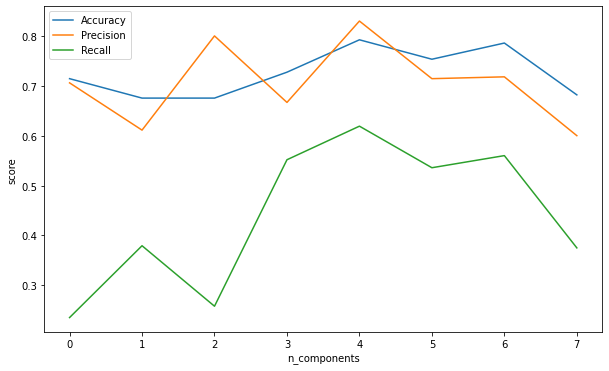

In [19]:
visualize_results(result_dict)